In [ ]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
import matplotlib as plt
from qiskit.circuit.library import UGate

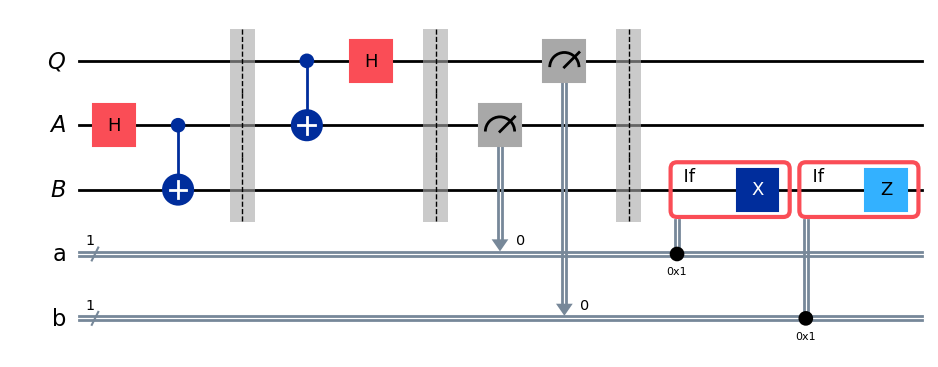

In [9]:
qubit = QuantumRegister(1,"Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1,"B")
a = ClassicalRegister(1,"a")
b = ClassicalRegister(1,"b")
# now to prepare the entangled bit which is shared by alice and bob 
protocol = QuantumCircuit(qubit, ebit0 ,ebit1, a ,b)
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

#now to perform alice's operations 
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

#now to measure the qubits of alice 
protocol.measure(ebit0 , a)
protocol.measure(qubit , b)
protocol.barrier()

#now to apply bobs condition

with protocol.if_test((a , 1)):
    protocol.x(ebit1)
with protocol.if_test((b , 1)):
    protocol.z(ebit1)    

protocol.draw('mpl')
